# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [6]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    after_function = (x**2)*(numpy.sin(x))
    '''print(after_function)'''
    return after_function

Ensure your function works with numpy arrays:

In [7]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [8]:
def g(x):
    '''Analytical integral of f(x).'''
    after_integral = ((2*x*(numpy.sin(x)))-(((x**2)-2)*numpy.cos(x)+2))
    '''print(after_integral)'''
    return after_integral

Check your solution with the same numpy array:

In [9]:
assert g(0) == 0.

In [10]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [11]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    definite_integral = (g(xmax) - g(xmin))
    '''print (definite_integral)'''
    return definite_integral

Check your analytic function:

In [12]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [22]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax - xmin)/N
    m = dx/2
    LHS = 0
    MID = 0
    SUM = 0
    
    for i in range (1,N*2):
        if i%2==0:
            SUM = SUM + (2*f(xmin+(i*dx/2)))
        if i%2==1:
            SUM = SUM + (4*f(xmin+(i*dx/2)))
            
    TOTAL_SUM = (dx/6)*(SUM + f(xmax) + f(xmin))
    

    
    return TOTAL_SUM
    

In [23]:
print(integrate_numeric(0,10,50))


69.34864631779405


Make sure you have implemented Simpson's rule correctly:

In [24]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [25]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Ln(Fractional error between numeric & analytic integration)')

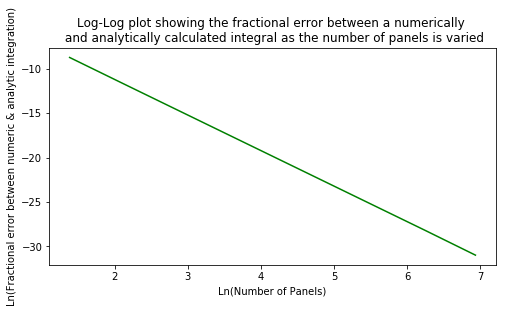

In [55]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = []
Number_of_x = len(panel_counts)

for i in range (0,Number_of_x):
    result_numeric.append(integrate_numeric(x0, x1, panel_counts[i]))
    
Diff_analytic_numeric = numpy.abs(result_analytic - result_numeric)

Error_analytic_numeric = Diff_analytic_numeric / result_analytic
log_Error_analytic_numeric = numpy.log(Error_analytic_numeric)

log_panel_counts = numpy.log(panel_counts)


plt.figure(figsize=(8, 4))
plt.plot(log_panel_counts, log_Error_analytic_numeric, color="green", label="The Graph")
plt.title('Log-Log plot showing the fractional error between a numerically \n and analytically calculated integral as the number of panels is varied')
plt.xlabel('Ln(Number of Panels)')
plt.ylabel('Ln(Fractional error between numeric & analytic integration)')


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

YOUR ANSWER HERE

If the trapezium rule was being used, how would the panel
count affect accuracy? 

YOUR ANSWER HERE